# Bank Data Analysis

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load Data
data=pd.read_csv('loan.csv')
data.head()

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/600865531.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('loan.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Data Understanding


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Get All Columns with Null Data

In [5]:
all_null_columns = data.columns[data.isnull().all()]
print("Columns with all null values:", all_null_columns.tolist())


Columns with all null values: ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_

In [6]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [7]:
data.shape

(39717, 111)

### Drop All Columns with Null Data

In [8]:
#Drop columns with all null data
data = data.drop(columns=all_null_columns)


In [9]:
data.shape

(39717, 57)

In [10]:
data.collections_12_mths_ex_med.value_counts()

collections_12_mths_ex_med
0.0    39661
Name: count, dtype: int64

### Get All Columns with only 1 Unique Values

In [11]:
single_unique_columns = data.columns[data.nunique() == 1]
single_unique_columns


Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [12]:
data.pymnt_plan.value_counts()#can be dropped

pymnt_plan
n    39717
Name: count, dtype: int64

In [13]:
data.initial_list_status.value_counts()#can be dropped

initial_list_status
f    39717
Name: count, dtype: int64

In [14]:
data.initial_list_status.value_counts()#can be dropped

initial_list_status
f    39717
Name: count, dtype: int64

In [15]:
selected_columns = data[single_unique_columns].value_counts()
selected_columns

pymnt_plan  initial_list_status  collections_12_mths_ex_med  policy_code  application_type  acc_now_delinq  chargeoff_within_12_mths  delinq_amnt  tax_liens
n           f                    0.0                         1            INDIVIDUAL        0               0.0                       0            0.0          39661
Name: count, dtype: int64

### Dropping the column which has only 1 unique values


In [16]:

data=data.drop(columns=single_unique_columns)


In [17]:
data.shape

(39717, 48)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [19]:
any_null_columns = data.columns[data.isnull().any()>500]
print("Columns with all null values:", any_null_columns.tolist())

Columns with all null values: []


In [20]:
data.mths_since_last_delinq.value_counts()

mths_since_last_delinq
0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: count, Length: 95, dtype: int64

### Further removing the columns which seems to be irrelavant


In [21]:
data=data.drop(columns=['url','next_pymnt_d','desc','id','member_id','sub_grade','zip_code','mths_since_last_delinq','mths_since_last_record',
                       'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','collection_recovery_fee'
                        ,'recoveries','last_pymnt_amnt','last_credit_pull_d'])

In [22]:
data.shape

(39717, 28)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   emp_title             37258 non-null  object 
 8   emp_length            38642 non-null  object 
 9   home_ownership        39717 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  title              

In [24]:
data.last_pymnt_d.value_counts()

last_pymnt_d
May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
          ... 
Jun-08      10
Nov-08      10
Mar-08       5
Jan-08       4
Feb-08       1
Name: count, Length: 101, dtype: int64

### Converting the date columns and saving them into separate column


In [25]:

data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'],format='%b-%d', errors='coerce')


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [27]:
data.earliest_cr_line.value_counts()

earliest_cr_line
Nov-98    370
Oct-99    366
Dec-98    348
Oct-00    346
Dec-97    329
         ... 
Feb-66      1
Dec-61      1
Oct-54      1
Jun-72      1
Oct-74      1
Name: count, Length: 526, dtype: int64

In [28]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'],format='%b-%y', errors='coerce')


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

### Creating 2 new columns from issue_das we are not sure if the value is month and year or month and date


In [30]:
data['issue_d_date'] = pd.to_datetime(data['issue_d'],format='%b-%d', errors='coerce')


In [31]:
data['issue_d_year'] = pd.to_datetime(data['issue_d'],format='%b-%y', errors='coerce')


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

### Modifying the term, int_rate column and revol_util into int or float columns


In [34]:
data.term=data.term.apply(lambda x: x.split(' months')[0])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  object        
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [35]:
data.term=data.term.apply(lambda x:int(x))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int64         
 4   int_rate              39717 non-null  object        
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [36]:
data.int_rate=data.int_rate.apply(lambda x: float(x.split('%')[0]))


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int64         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [38]:
data.revol_util=data.revol_util.apply(lambda x : float(str(x).split('%')[0]))

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int64         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_title             37258 non-null  object        
 8   emp_length            38642 non-null  object        
 9   home_ownership        39717 non-null  object        
 10  annual_inc            39717 non-null  float64       
 11  verification_status   39717 non-null  object        
 12  issue_d               39717 non-null  object        
 13  loan_status     

In [40]:
data=data.drop(columns=['emp_title','title','revol_bal'])

In [41]:
data=data.drop(columns=['revol_util','earliest_cr_line','last_pymnt_d']) ## Thes columns also does not seems to be relavant

### Data Imputing or Cleaning

In [42]:
##Imputed Null value with most frequent value
data.pub_rec_bankruptcies=data.pub_rec_bankruptcies.fillna(0.0)

In [43]:
##Imputing null values with most occuring value
data.emp_length=data.emp_length.fillna('10+ years')

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             39717 non-null  int64         
 1   funded_amnt           39717 non-null  int64         
 2   funded_amnt_inv       39717 non-null  float64       
 3   term                  39717 non-null  int64         
 4   int_rate              39717 non-null  float64       
 5   installment           39717 non-null  float64       
 6   grade                 39717 non-null  object        
 7   emp_length            39717 non-null  object        
 8   home_ownership        39717 non-null  object        
 9   annual_inc            39717 non-null  float64       
 10  verification_status   39717 non-null  object        
 11  issue_d               39717 non-null  object        
 12  loan_status           39717 non-null  object        
 13  purpose         

In [45]:
## Remove The  rows with loan status as current as they are not relevant to us
data= data[data.loan_status!='Current']


In [46]:
data.shape

(38577, 24)

### Bucketing for  some numeric column

In [47]:
data.annual_inc.describe()## Create bucket based on 25 percentile

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

KeyError: "['annual_inc_range'] not found in axis"

In [49]:
#Create a new column with range

bins = [0, 40000,50000,60000,70000,80000,6500000]
labels = ['0-40k','40k-50k', '50k-60k','60k-70k','70k-80k','80k+']

# Create a new column with ranges
data['annual_inc_range'] = pd.cut(data['annual_inc'], bins=bins, labels=labels, right=False)

In [50]:
data.annual_inc_range.value_counts()

annual_inc_range
80k+       10631
0-40k       8843
40k-50k     5517
50k-60k     5135
60k-70k     4848
70k-80k     3603
Name: count, dtype: int64

In [51]:
data.loan_amnt.describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [52]:
#Create a new column with range

bins = [0,5500,8000,10500,13000,15500,36000]
labels = ['0-5.5k','5.5k-8k','8k-10.5k','10.5k-13k','13k-15.5k','15.5k+']

# Create a new column with ranges
data['loan_amnt_range'] = pd.cut(data['loan_amnt'], bins=bins, labels=labels, right=False)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  object        
 12  loan_status           38577 non-null  object        
 13  purpose              

In [54]:
data.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

In [55]:
bins = [0,9,10,11,12,13,14,25]
labels = ['0-9','9-10','10-11','11-12','12-13','13-14','14+']

# Create a new column with ranges
data['int_rate_range'] = pd.cut(data['int_rate'], bins=bins, labels=labels, right=False)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  object        
 12  loan_status           38577 non-null  object        
 13  purpose              

In [57]:
##need to add bins here for dti column
bins = [0,8,9,10,11,12,13,14,15,16,17,18,19,30]
labels = ['0-8','8-9','9-10','10-11','11-12','12-13','13-14','14-15','15-16','16-17','17-18','18-19','19+']

# Create a new column with ranges
data['dti_range'] = pd.cut(data['dti'], bins=bins, labels=labels, right=False)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  object        
 12  loan_status           38577 non-null  object        
 13  purpose              

## Univatiate Analysis

####  loan_amnt

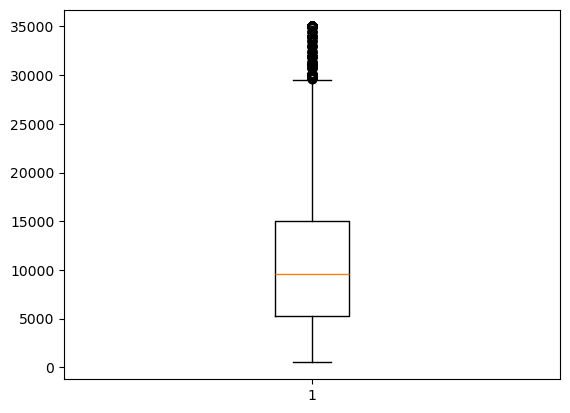

In [59]:
plt.boxplot(data.loan_amnt)
plt.show()
## there is no outlier 

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/1643469897.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='loan_amnt_range', palette='viridis')


Text(0, 0.5, 'Count')

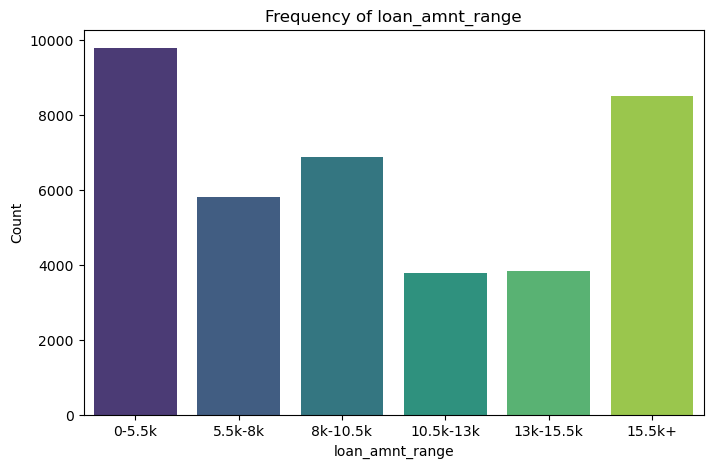

In [60]:

plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='loan_amnt_range', palette='viridis')
plt.title('Frequency of loan_amnt_range')
plt.xlabel('loan_amnt_range')
plt.ylabel('Count')

##Base on the Bar Plot  we can say that most of the loan amount ranges from 0 to 5000 


#### Funded Amount

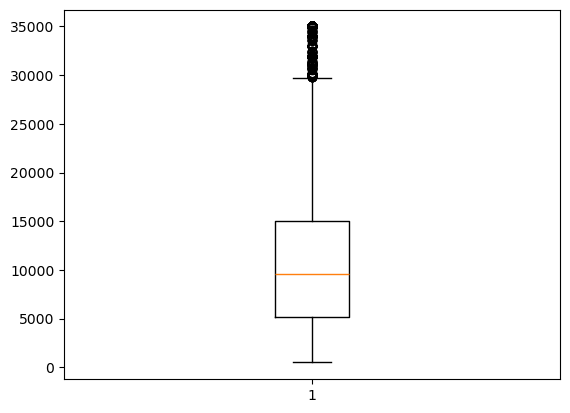

In [61]:
plt.boxplot(data.funded_amnt)
plt.show()

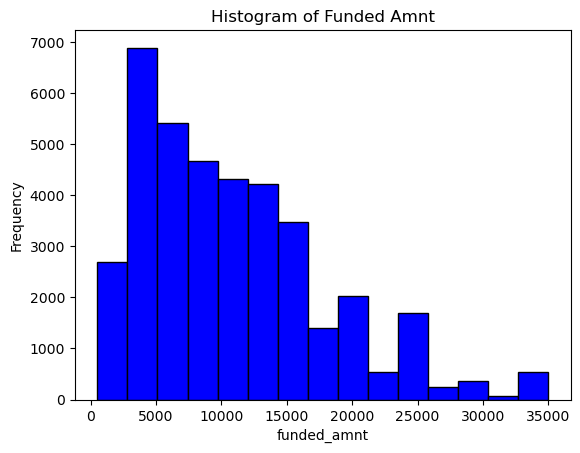

In [62]:
#funded_amnt
plt.hist(data.funded_amnt, bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Funded Amnt')
plt.xlabel('funded_amnt')
plt.ylabel('Frequency')
plt.show()
## Most of the funded amount ranges from 0-5000

#### Term

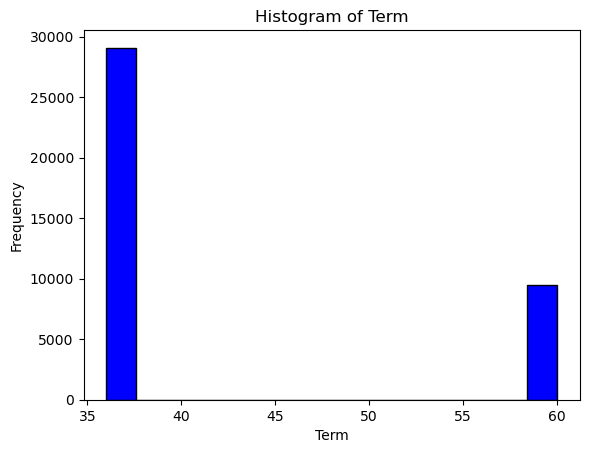

In [63]:
#term
plt.hist(data.term, bins=15, color='blue', edgecolor='black')
plt.title('Histogram of Term')
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.show()
# Most of the people are taking loan for 2 years 

### int_rate

<function matplotlib.pyplot.show(close=None, block=None)>

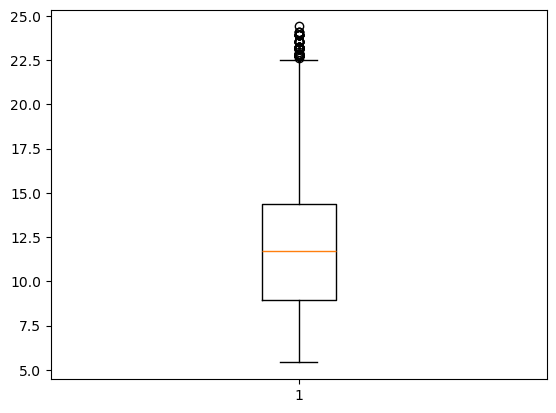

In [64]:
plt.boxplot(data.int_rate)
plt.show

### Grade

In [65]:
data.grade.value_counts()

grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64

<Axes: ylabel='count'>

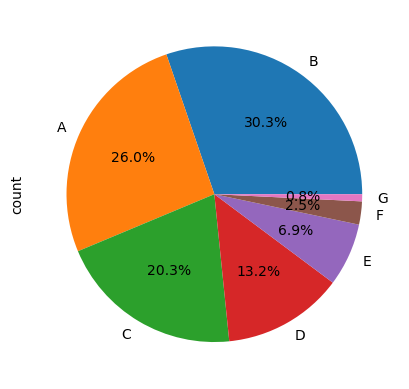

In [66]:
data.grade.value_counts().plot(kind="pie",autopct='%1.1f%%')
## 30.3% records are of B grade

### Emp_length

In [67]:
data.emp_length.value_counts()

emp_length
10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: count, dtype: int64

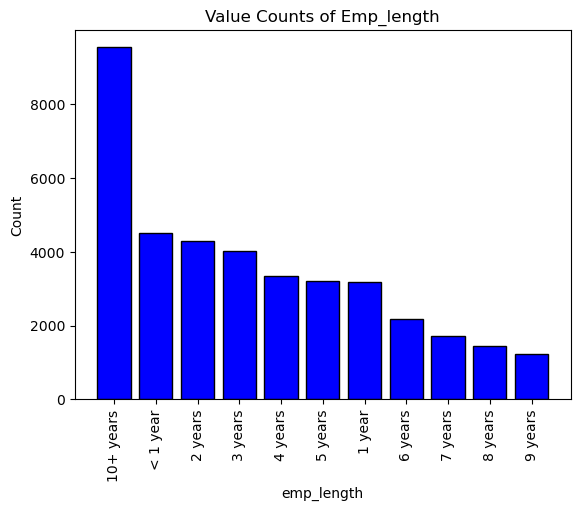

In [68]:
emp_length_value_counts=data.emp_length.value_counts()
plt.bar(emp_length_value_counts.index, emp_length_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of Emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()
## Most of the employees with 10+ year of experience are more likely to take the loan 
##and the chance of taking loan decreases with year of experience

### Home Ownership

In [69]:
data.home_ownership.value_counts()

home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64

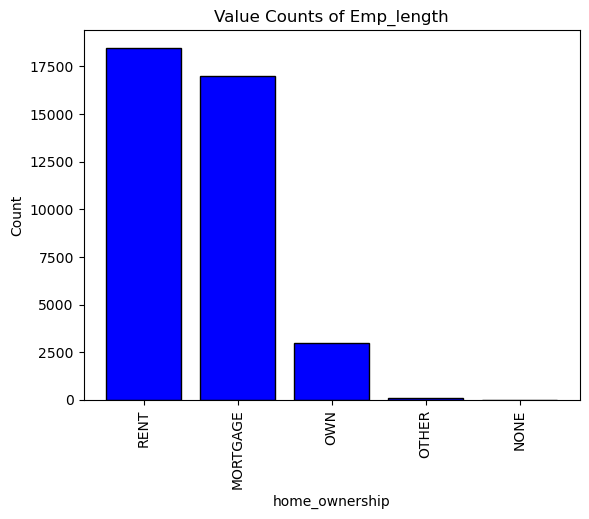

In [70]:
##home_ownership
home_ownership_value_counts=data.home_ownership.value_counts()
plt.bar(home_ownership_value_counts.index, home_ownership_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of Emp_length')
plt.xlabel('home_ownership')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()
## People taking loans are mostly living on rent

### Annual Income

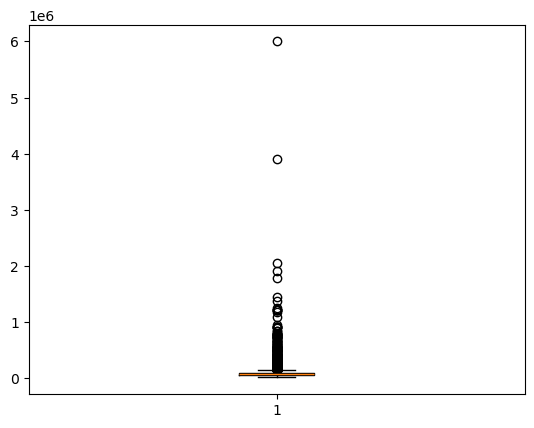

In [71]:
#annual_inc
data.annual_inc.describe()
plt.boxplot(data.annual_inc)
plt.show()



In [72]:
data.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [73]:
##Remove outlier from the annual income as more annual income should be able to pay the loan
data2=data[data.annual_inc<=400000]
data2.shape

(38487, 28)

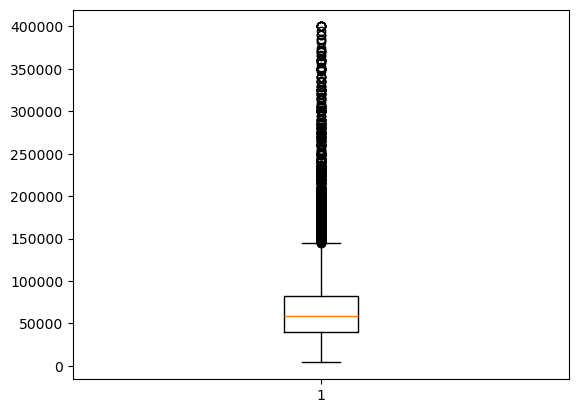

In [74]:
data2.annual_inc.describe()
plt.boxplot(data2.annual_inc)
plt.show()


In [75]:
data2.annual_inc.describe()
## Most of the people have salary in range 40k to 80k

count     38487.000000
mean      67032.540256
std       40271.401225
min        4000.000000
25%       40000.000000
50%       58560.000000
75%       82000.000000
max      400000.000000
Name: annual_inc, dtype: float64

In [76]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38487 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38487 non-null  int64         
 1   funded_amnt           38487 non-null  int64         
 2   funded_amnt_inv       38487 non-null  float64       
 3   term                  38487 non-null  int64         
 4   int_rate              38487 non-null  float64       
 5   installment           38487 non-null  float64       
 6   grade                 38487 non-null  object        
 7   emp_length            38487 non-null  object        
 8   home_ownership        38487 non-null  object        
 9   annual_inc            38487 non-null  float64       
 10  verification_status   38487 non-null  object        
 11  issue_d               38487 non-null  object        
 12  loan_status           38487 non-null  object        
 13  purpose              

### Verification Status

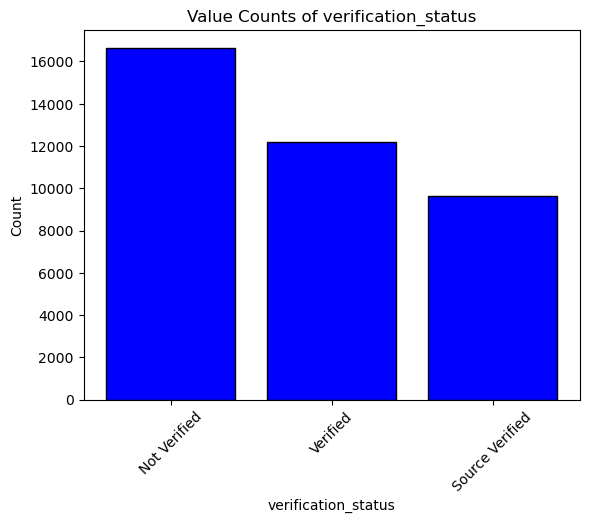

In [77]:
# verification Status

vs_value_counts=data2.verification_status.value_counts()
plt.bar(vs_value_counts.index, vs_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of verification_status')
plt.xlabel('verification_status')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()
## MOst of the applications are not verified 

### issue_d_year

In [78]:
# issue_d_year
data2.issue_d_year.dt.year.value_counts()


issue_d_year
2011    20490
2010    11490
2009     4700
2008     1558
2007      249
Name: count, dtype: int64

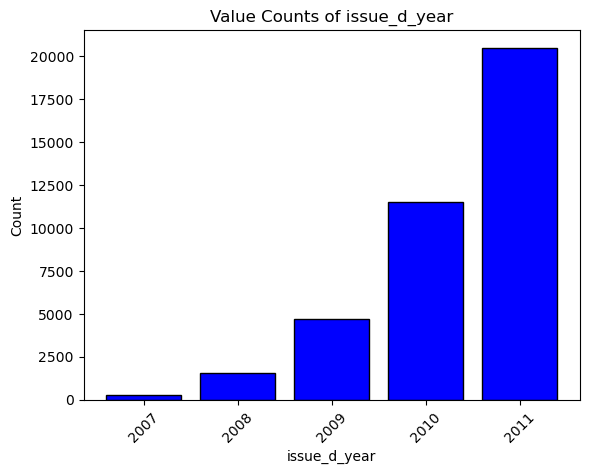

In [79]:

id_value_counts=data2.issue_d_year.dt.year.value_counts()
plt.bar(id_value_counts.index, id_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of issue_d_year')
plt.xlabel('issue_d_year')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

##Most of the loans are taken on 2011

### loan_status

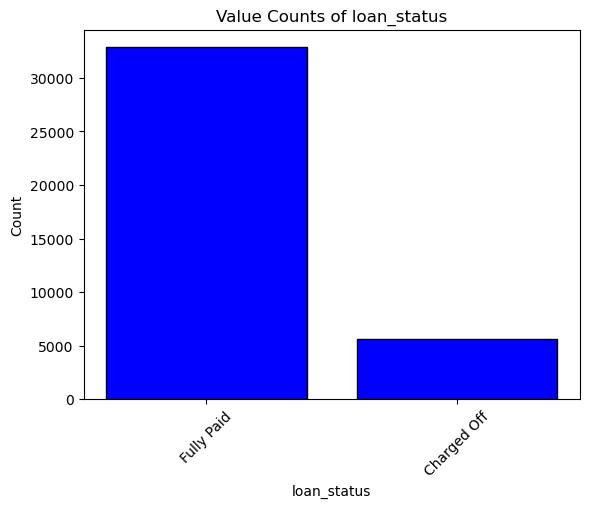

In [80]:
##loan_status
ls_value_counts=data2.loan_status.value_counts()
plt.bar(ls_value_counts.index, ls_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of loan_status')
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
##Most of the people had fully paid the loan

### purpose 

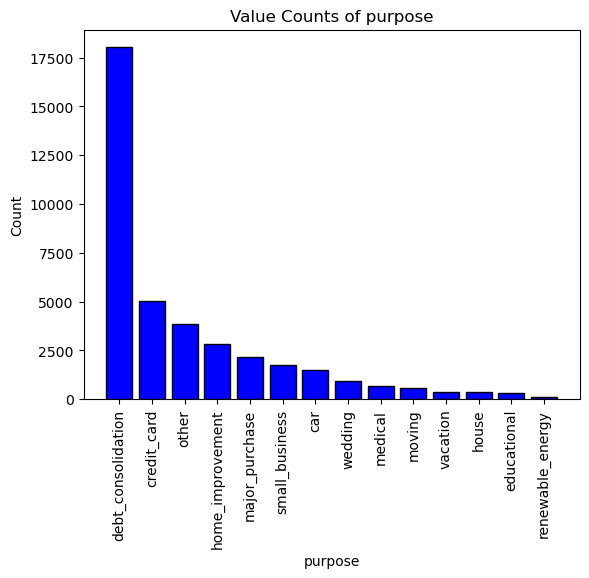

In [81]:
##purpose
ps_value_counts=data2.purpose.value_counts()
plt.bar(ps_value_counts.index, ps_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of purpose')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()
##Most of the people have purpose debt_consolidation
##Maybe they have taken loan to take another loan

### Address State

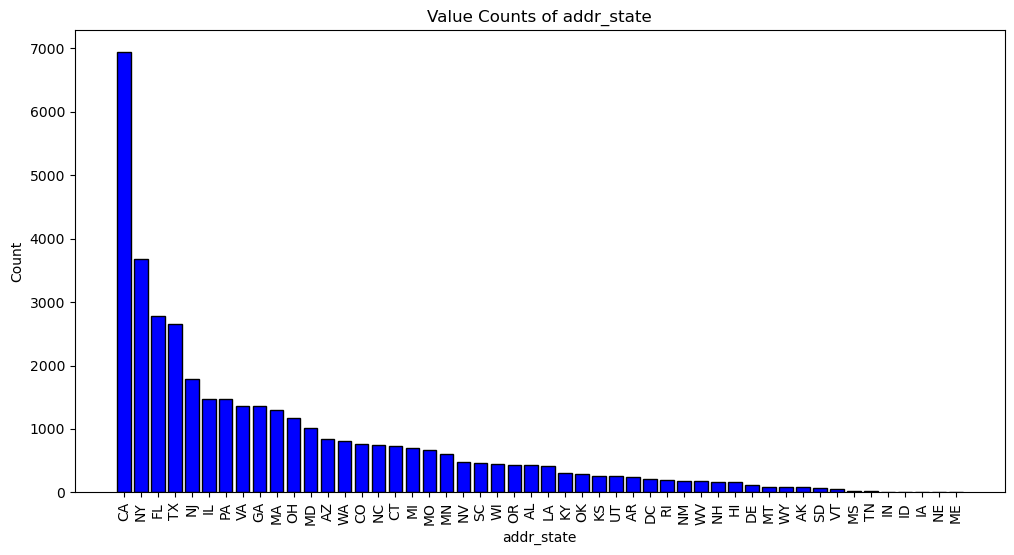

In [82]:
##Address state
ad_value_counts=data2.addr_state.value_counts()
plt.figure(figsize=(12, 6)) 
plt.bar(ad_value_counts.index, ad_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of addr_state')
plt.xlabel('addr_state')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

##More no of loan are taken from address state CA

In [83]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38487 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38487 non-null  int64         
 1   funded_amnt           38487 non-null  int64         
 2   funded_amnt_inv       38487 non-null  float64       
 3   term                  38487 non-null  int64         
 4   int_rate              38487 non-null  float64       
 5   installment           38487 non-null  float64       
 6   grade                 38487 non-null  object        
 7   emp_length            38487 non-null  object        
 8   home_ownership        38487 non-null  object        
 9   annual_inc            38487 non-null  float64       
 10  verification_status   38487 non-null  object        
 11  issue_d               38487 non-null  object        
 12  loan_status           38487 non-null  object        
 13  purpose              

### DTI

In [84]:
data2.dti.value_counts()

dti
0.00     176
12.00     46
18.00     45
13.20     39
19.20     39
        ... 
28.26      1
28.95      1
25.77      1
27.20      1
25.43      1
Name: count, Length: 2853, dtype: int64

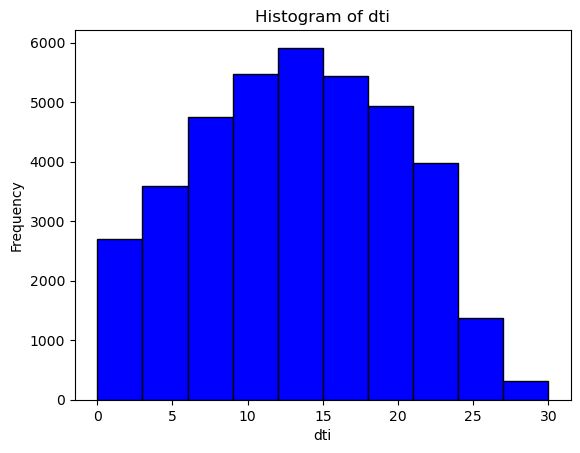

In [85]:
##dti
plt.hist(data2.dti, bins=10, color='blue', edgecolor='black')
plt.title('Histogram of dti')
plt.xlabel('dti')
plt.ylabel('Frequency')
plt.show()
##People with dti 12-15 are mostly taking the loan

### delinq_2yrs

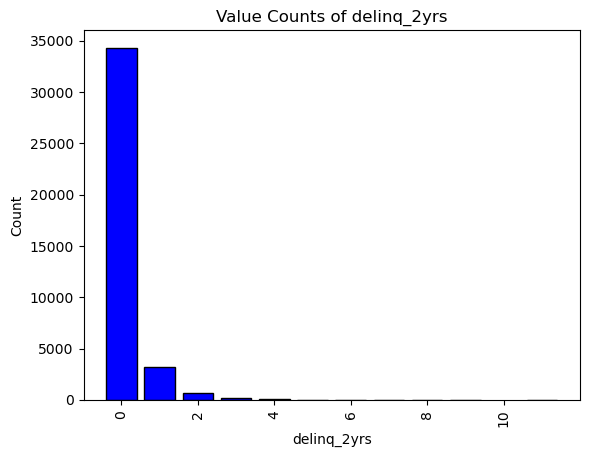

In [86]:
##delinq_2yrs
delinq_value_counts=data2.delinq_2yrs.value_counts()
plt.bar(delinq_value_counts.index, delinq_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of delinq_2yrs')
plt.xlabel('delinq_2yrs')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()
##Most of the people are able to pay the emi within 30 days

### open_acc

In [87]:

data2.open_acc.value_counts()


open_acc
7     3903
6     3838
8     3806
9     3600
5     3105
10    3087
11    2662
4     2296
12    2190
13    1848
3     1468
14    1425
15    1144
16     906
17     711
2      594
18     514
19     381
20     281
21     235
22     137
23      91
24      75
25      53
26      34
28      24
27      22
30      15
29      13
31       7
34       5
35       4
32       3
33       3
36       2
39       1
38       1
44       1
41       1
42       1
Name: count, dtype: int64

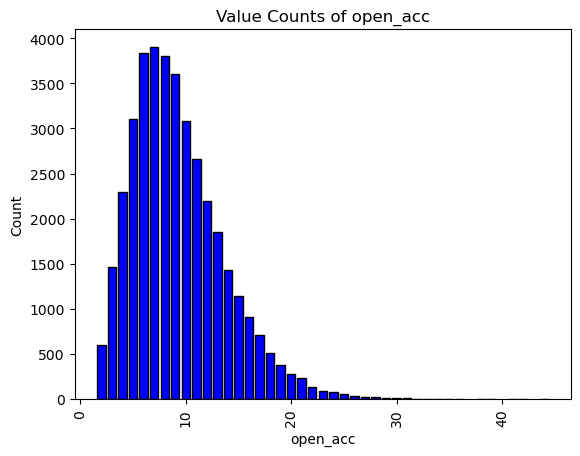

In [88]:
open_acc_value_counts=data2.open_acc.value_counts()
plt.bar(open_acc_value_counts.index, open_acc_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of open_acc')
plt.xlabel('open_acc')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show() 
## No specific Insight from this

### pub_rec

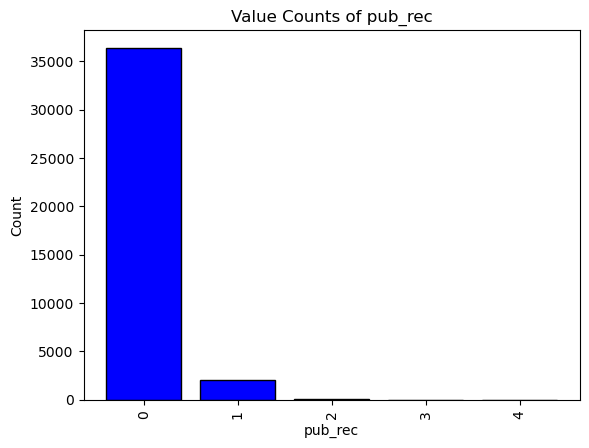

In [89]:
##pub_rec
pub_rec_value_counts=data2.pub_rec.value_counts()
plt.bar(pub_rec_value_counts.index, pub_rec_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of pub_rec')
plt.xlabel('pub_rec')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()
##Mostly no public records

### pub_rec_bankruptcies

In [90]:

data2.pub_rec_bankruptcies.value_counts()
#data2.info()

pub_rec_bankruptcies
0.0    36848
1.0     1634
2.0        5
Name: count, dtype: int64

In [91]:
data2.pub_rec_bankruptcies.value_counts()

pub_rec_bankruptcies
0.0    36848
1.0     1634
2.0        5
Name: count, dtype: int64

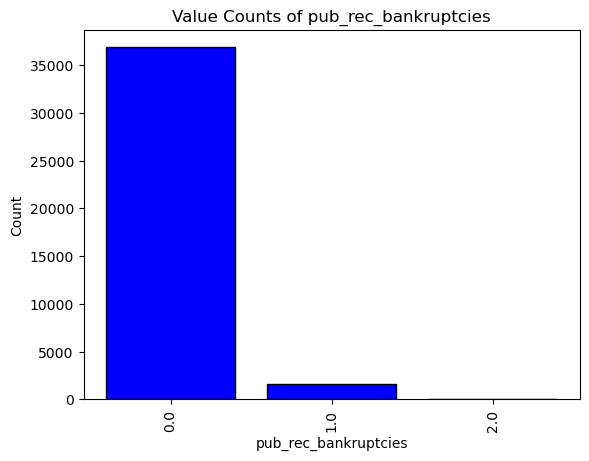

In [92]:
bankrupt_value_counts=data2.pub_rec_bankruptcies.value_counts()
plt.bar(bankrupt_value_counts.index.astype(str), bankrupt_value_counts.values, color='blue', edgecolor='black')
plt.title('Value Counts of pub_rec_bankruptcies')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.show()
##Most of the Person are not bankrupt

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   funded_amnt           38577 non-null  int64         
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  int64         
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  object        
 7   emp_length            38577 non-null  object        
 8   home_ownership        38577 non-null  object        
 9   annual_inc            38577 non-null  float64       
 10  verification_status   38577 non-null  object        
 11  issue_d               38577 non-null  object        
 12  loan_status           38577 non-null  object        
 13  purpose              

# BIVARIATE ANALYSIS

## Identifying the COrrelation between numeric Variables

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,dti,delinq_2yrs,pub_rec_bankruptcies
loan_amnt,1.000000,0.981810,0.938031,0.347522,0.301131,0.932145,0.411757,0.064289,-0.031981,-0.034753
funded_amnt,0.981810,1.000000,0.956208,0.325710,0.304817,0.957926,0.407288,0.064000,-0.031790,-0.035818
funded_amnt_inv,0.938031,0.956208,1.000000,0.344668,0.297294,0.905395,0.390203,0.072194,-0.038109,-0.036025
term,0.347522,0.325710,0.344668,1.000000,0.440158,0.091008,0.069020,0.076357,0.007473,0.016335
int_rate,0.301131,0.304817,0.297294,0.440158,1.000000,0.277194,0.078690,0.111537,0.158449,0.084156
installment,0.932145,0.957926,0.905395,0.091008,0.277194,1.000000,0.411373,0.054022,-0.019791,-0.032583
annual_inc,0.411757,0.407288,0.390203,0.069020,0.078690,0.411373,1.000000,-0.125094,0.032826,-0.022550
dti,0.064289,0.064000,0.072194,0.076357,0.111537,0.054022,-0.125094,1.000000,-0.032935,0.007319
delinq_2yrs,-0.031981,-0.031790,-0.038109,0.007473,0.158449,-0.019791,0.032826,-0.032935,1.000000,0.003156
pub_rec_bankruptcies,-0.034753,-0.035818,-0.036025,0.016335,0.084156,-0.032583,-0.022550,0.007319,0.003156,1.000000


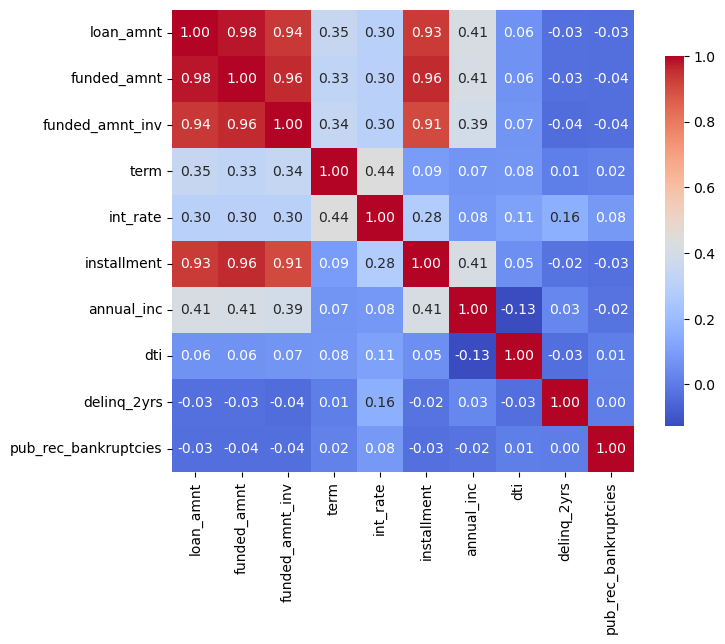

In [94]:
data3=data2[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','annual_inc','dti','delinq_2yrs','pub_rec_bankruptcies']]
correlation_matrix = data3.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
correlation_matrix


### Analyse Loan Amnt and Loan_STATUS

Text(0, 0.5, 'loan_amnt')

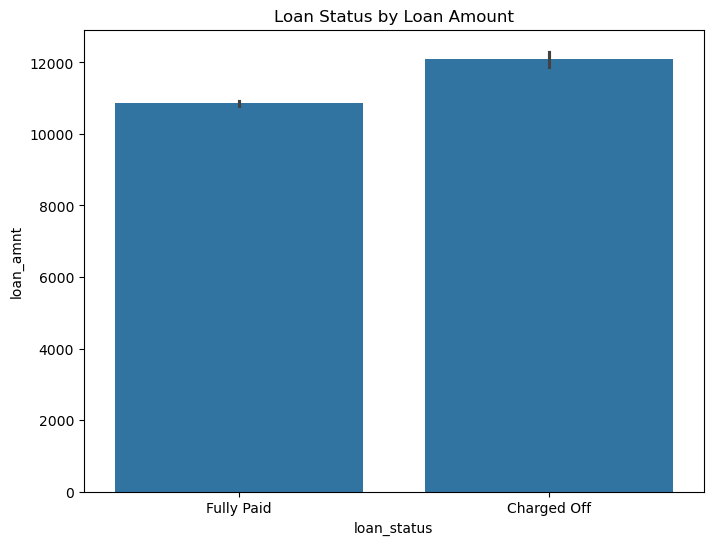

In [95]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data2, x='loan_status', y='loan_amnt')

# Add titles and labels
plt.title('Loan Status by Loan Amount')
plt.xlabel('loan_status')
plt.ylabel('loan_amnt')
## Higher the loan higher the chances of being charged off


### Analyse Loan_status and term


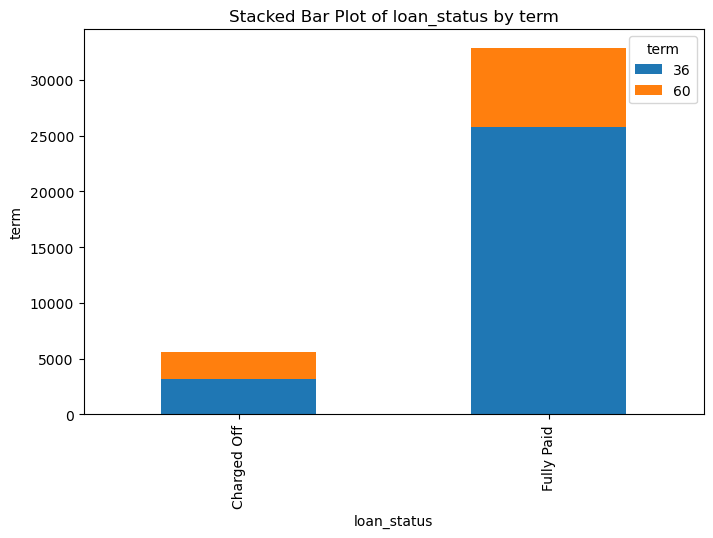

In [96]:
contingency_table = pd.crosstab(data2['loan_status'], data2['term'])
contingency_table
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Plot of loan_status by term')
plt.xlabel('loan_status')
plt.ylabel('term')
plt.show()
##Overall Most of the people are able to fully pay the loan  and have taken loan for 2 yrs

### int_rate and status


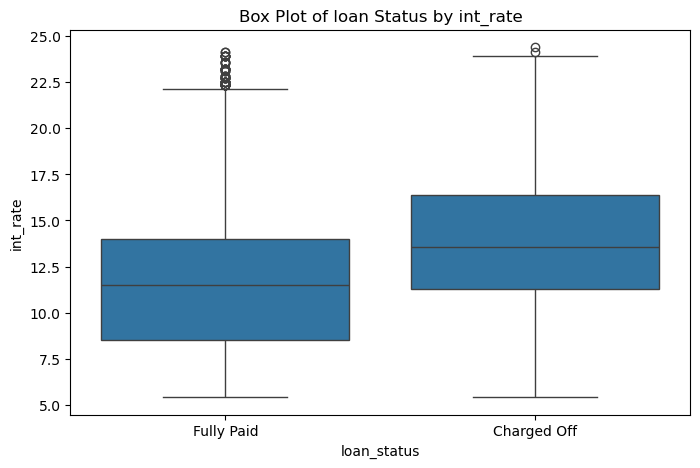

In [97]:
##int_rate and status
plt.figure(figsize=(8, 5))
sns.boxplot(data=data2, x='loan_status', y='int_rate')
plt.title('Box Plot of loan Status by int_rate')
plt.show()
## People who were able to pay the loan have lesser interest rates than the one who are charged off 

### emp_length and loan_status 


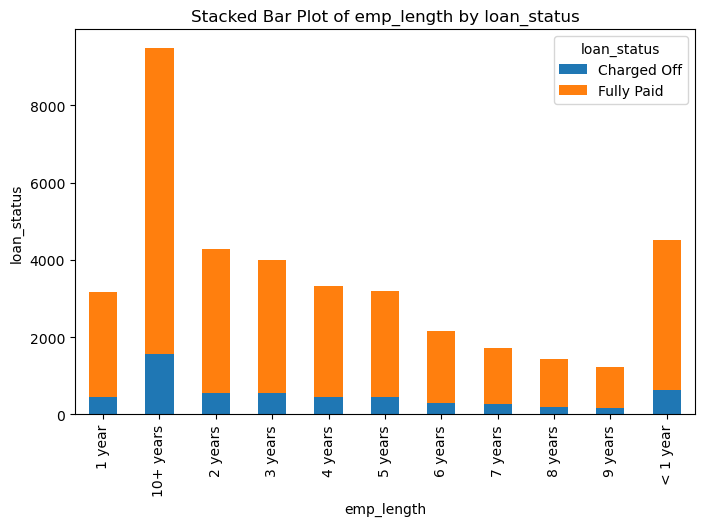

In [98]:
##emp_length and loan_status 
## Categorical vs categorical

contingency_table = pd.crosstab(data2['emp_length'], data2['loan_status'])
contingency_table
# Create a stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Plot of emp_length by loan_status')
plt.xlabel('emp_length')
plt.ylabel('loan_status')
plt.show()
##10+ Years are taking more loans and they are maximum in both who fully paid and charged off
## Need further analysis for Charged Off loans

#### Bar plot for term for only people who are charged off


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/3378637641.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


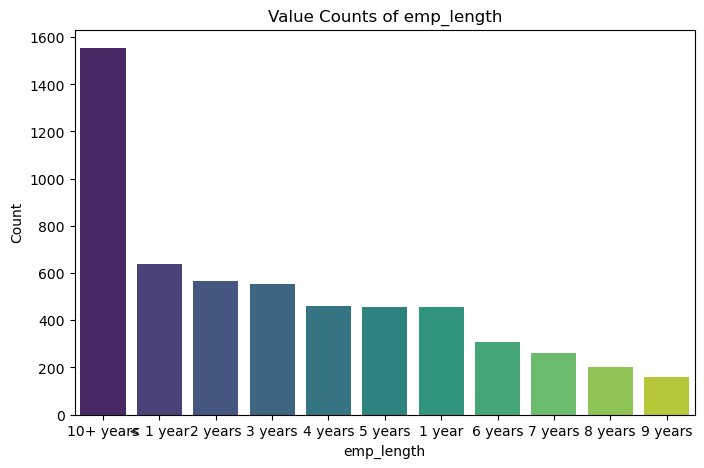

In [99]:
## Bar plot for term for only people who are charged off


charged_off_data=data2[data2.loan_status=='Charged Off']
value_counts = charged_off_data['emp_length'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')

# Show the plot
plt.show()

                        


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/629474777.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


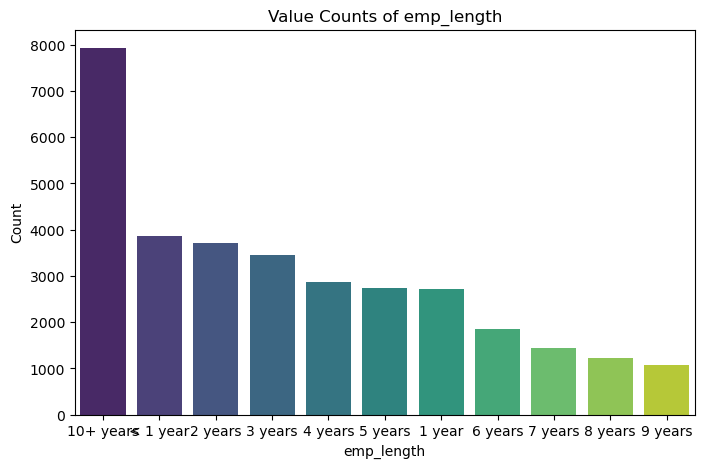

In [100]:
fully_paid_data=data2[data2.loan_status=='Fully Paid']
value_counts = fully_paid_data['emp_length'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add titles and labels
plt.title('Value Counts of emp_length')
plt.xlabel('emp_length')
plt.ylabel('Count')

# Show the plot
plt.show()


In [130]:
emp_length_vs_loan = data2.groupby(['emp_length', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
emp_length_vs_loan['Total'] = emp_length_vs_loan['Charged Off']+ emp_length_vs_loan['Fully Paid']
emp_length_vs_loan['Chargedoff_ratio'] = emp_length_vs_loan['Charged Off'] / emp_length_vs_loan['Total']
emp_length_vs_loan.sort_values('Chargedoff_ratio', ascending=False)
emp_length_vs_loan

loan_status,emp_length,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,1 year,456,2707,3163,0.144167
1,10+ years,1554,7932,9486,0.163820
2,2 years,566,3715,4281,0.132212
3,3 years,555,3449,4004,0.138611
4,4 years,459,2875,3334,0.137672
5,5 years,457,2730,3187,0.143395
6,6 years,306,1858,2164,0.141405
7,7 years,263,1445,1708,0.153981
8,8 years,203,1228,1431,0.141859
9,9 years,158,1066,1224,0.129085


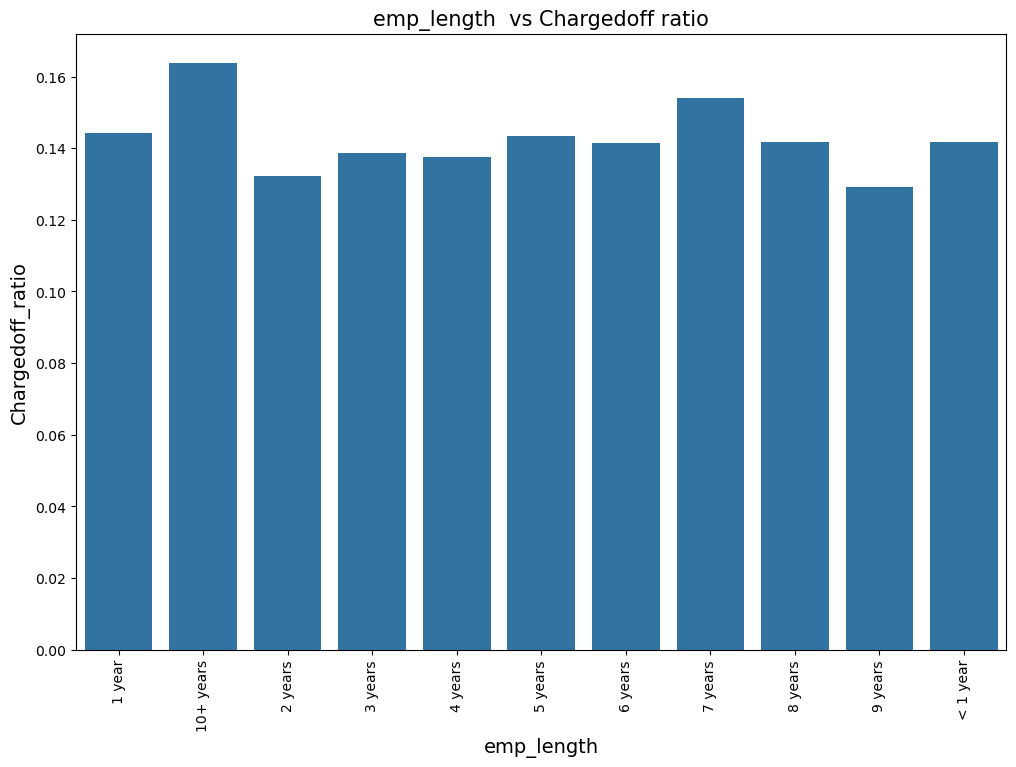

In [132]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('emp_length  vs Chargedoff ratio',fontsize=15)
ax1=sns.barplot(x='emp_length', y='Chargedoff_ratio', data=emp_length_vs_loan)
ax1.set_xlabel('emp_length',fontsize=14)
ax1.set_ylabel('Chargedoff_ratio',fontsize=14)
plt.xticks(rotation=90)
plt.show()
## People with 10+ year of exp are more likely to get charged off

#### home_ownership and loan_Status


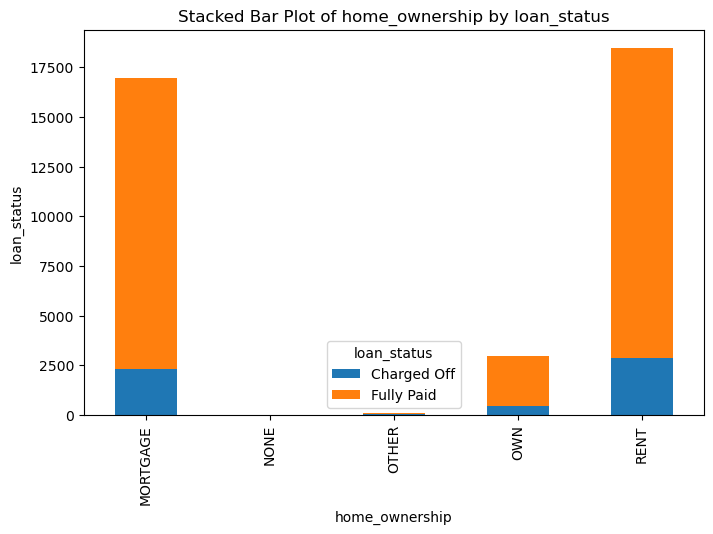

In [101]:
###home_ownership and loan_Status
cross_table = pd.crosstab(data2['home_ownership'], data2['loan_status'])
cross_table
# Create a stacked bar plot
cross_table.plot(kind='bar', stacked=True, figsize=(8, 5))
plt.title('Stacked Bar Plot of home_ownership by loan_status')
plt.xlabel('home_ownership')
plt.ylabel('loan_status')
plt.show()
## Most of the people who are on rent are most likely charged off as well


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/2388554228.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


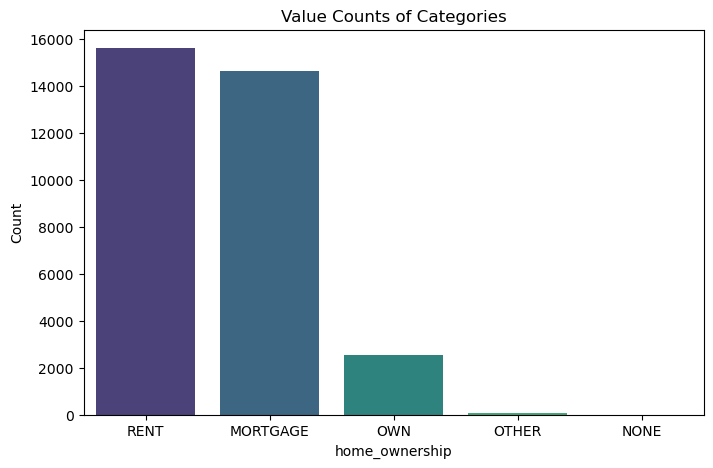

In [103]:
value_counts = fully_paid_data['home_ownership'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add titles and labels
plt.title('Value Counts of Categories')
plt.xlabel('home_ownership')
plt.ylabel('Count')

# Show the plot
plt.show()


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/3279356433.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


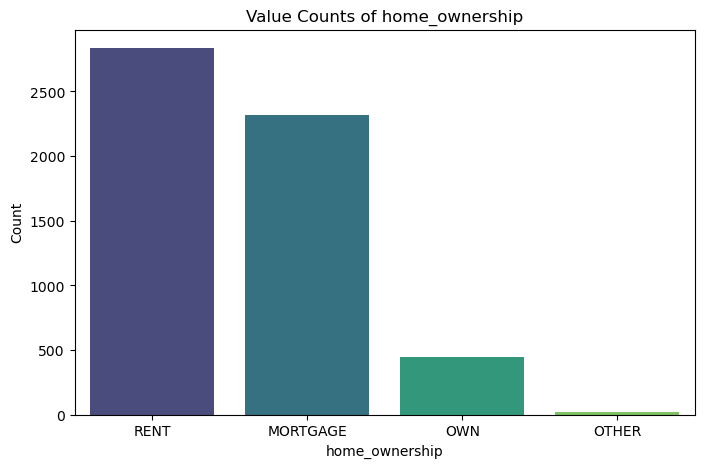

In [102]:
value_counts = charged_off_data['home_ownership'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add titles and labels
plt.title('Value Counts of home_ownership')
plt.xlabel('home_ownership')
plt.ylabel('Count')

# Show the plot
plt.show()

In [ ]:
##As we see thier is no diffrence in pattern for charged off and fully paid data we have to check for the 
#average of data as max loan are taken by people 
#on rent

In [128]:
home_ownership_vs_loan = data2.groupby(['home_ownership', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
home_ownership_vs_loan['Total'] = home_ownership_vs_loan['Charged Off']+ home_ownership_vs_loan['Fully Paid']
home_ownership_vs_loan['Chargedoff_ratio'] = home_ownership_vs_loan['Charged Off'] / home_ownership_vs_loan['Total']
home_ownership_vs_loan.sort_values('Chargedoff_ratio', ascending=False)
home_ownership_vs_loan

loan_status,home_ownership,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,MORTGAGE,2318.0,14642.0,16960.0,0.136675
1,NONE,0.0,3.0,3.0,0.000000
2,OTHER,18.0,79.0,97.0,0.185567
3,OWN,442.0,2528.0,2970.0,0.148822
4,RENT,2837.0,15620.0,18457.0,0.153709


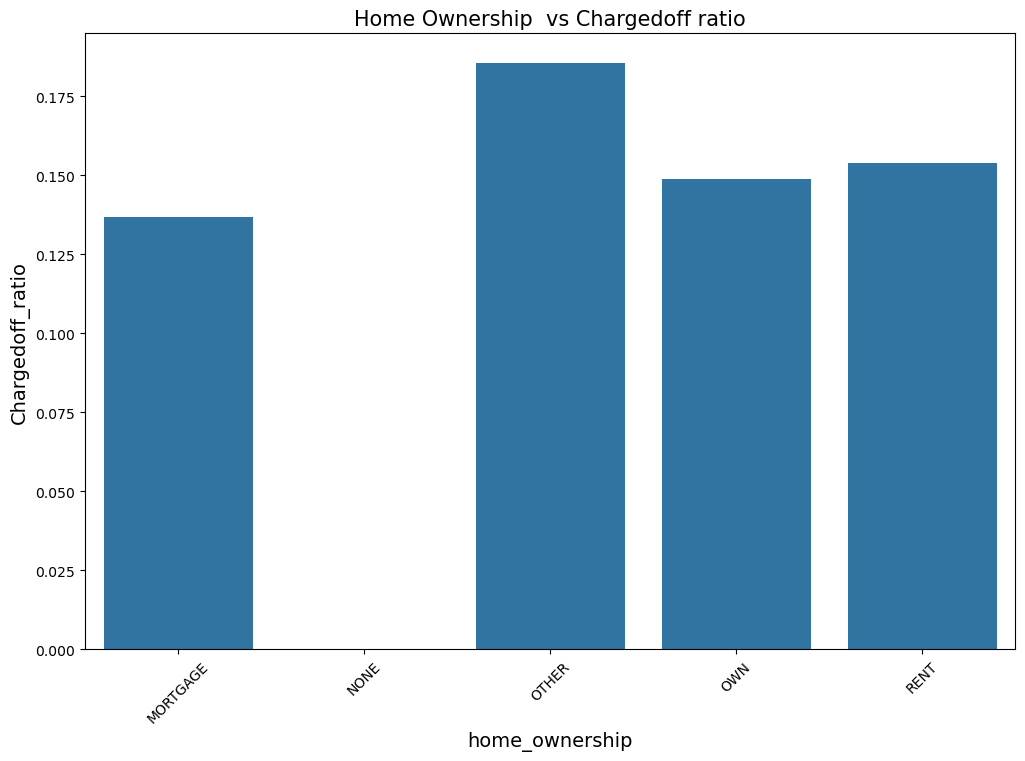

In [129]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Home Ownership  vs Chargedoff ratio',fontsize=15)
ax1=sns.barplot(x='home_ownership', y='Chargedoff_ratio', data=home_ownership_vs_loan)
ax1.set_xlabel('home_ownership',fontsize=14)
ax1.set_ylabel('Chargedoff_ratio',fontsize=14)
plt.xticks(rotation=45)
plt.show()

In [104]:

data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38487 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38487 non-null  int64         
 1   funded_amnt           38487 non-null  int64         
 2   funded_amnt_inv       38487 non-null  float64       
 3   term                  38487 non-null  int64         
 4   int_rate              38487 non-null  float64       
 5   installment           38487 non-null  float64       
 6   grade                 38487 non-null  object        
 7   emp_length            38487 non-null  object        
 8   home_ownership        38487 non-null  object        
 9   annual_inc            38487 non-null  float64       
 10  verification_status   38487 non-null  object        
 11  issue_d               38487 non-null  object        
 12  loan_status           38487 non-null  object        
 13  purpose              

### int_rate vs charged_off data

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/3748485727.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


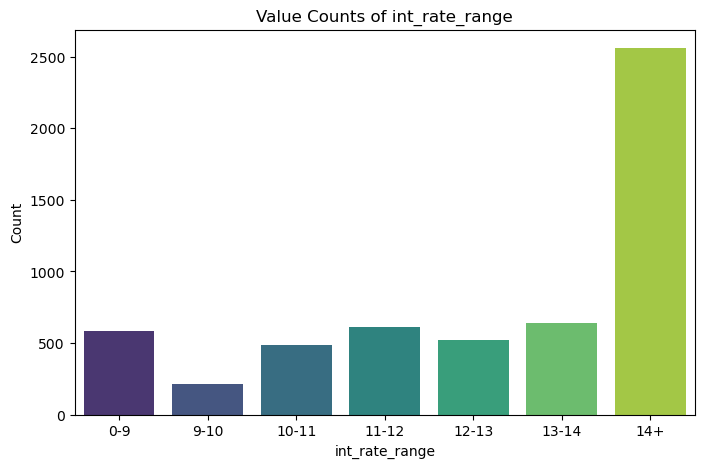

In [105]:
value_counts = charged_off_data['int_rate_range'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add titles and labels
plt.title('Value Counts of int_rate_range')
plt.xlabel('int_rate_range')
plt.ylabel('Count')

# Show the plot
plt.show()
##Higher Interest rate person are most likely to be charged off

### installment v/s loan_status

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/1446176839.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=charged_off_data, y='loan_status', x='installment', jitter=True, palette='viridis')


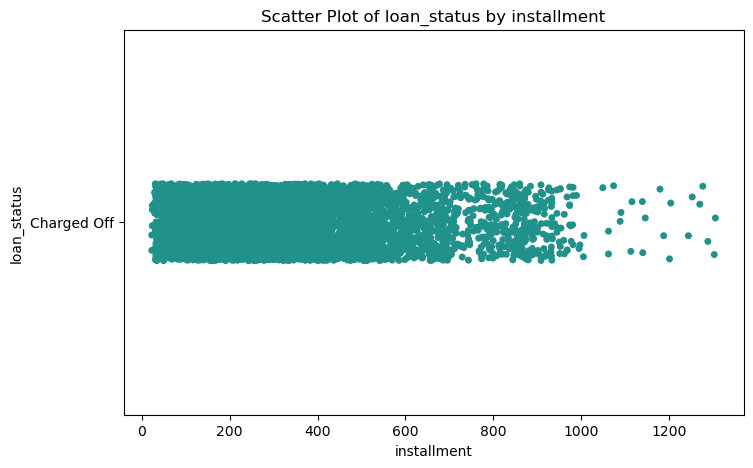

In [106]:

plt.figure(figsize=(8, 5))
sns.stripplot(data=charged_off_data, y='loan_status', x='installment', jitter=True, palette='viridis')

# Add titles and labels
plt.title('Scatter Plot of loan_status by installment')
plt.xlabel('installment')
plt.ylabel('loan_status')

# Show the plot
plt.show()
##Installment does not actually impact if they are charged off or not as most of the person have less installment

### Grade vs charged-off-data

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/3082236662.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


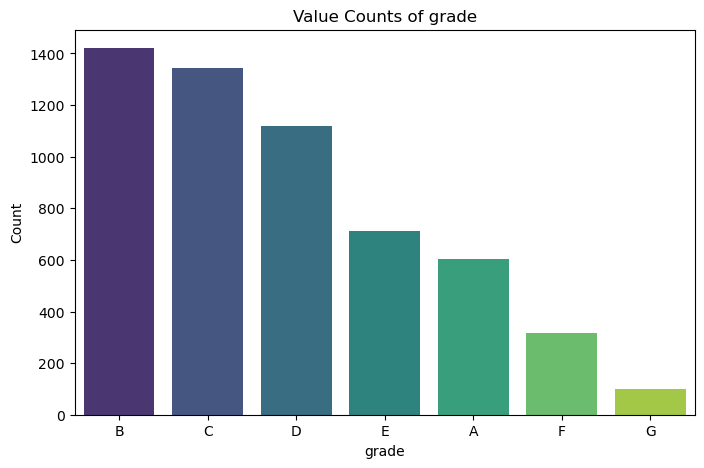

In [107]:
value_counts = charged_off_data['grade'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

# Add titles and labels
plt.title('Value Counts of grade')
plt.xlabel('grade')
plt.ylabel('Count')

# Show the plot
plt.show()
##People with grade B are most likely to be charged off

### Verification Status v/s charged-off-data


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/1107056897.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


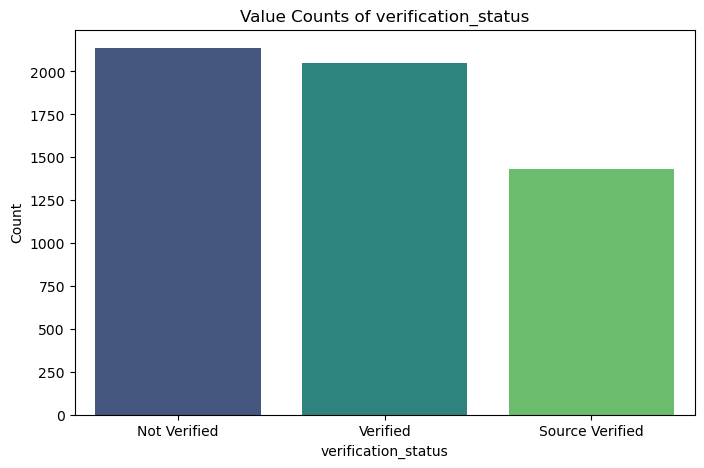

In [108]:
### Verification Status v/s chargded-off-data
value_counts = charged_off_data['verification_status'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of verification_status')
plt.xlabel('verification_status')
plt.ylabel('Count')

plt.show()
##People with source verified are less likely to get charged off

### issue_d_year v/s charged_off_data


In [109]:
charged_off_data.issue_d_year.dt.year.describe()

count    5615.000000
mean     2010.362244
std         0.894626
min      2007.000000
25%      2010.000000
50%      2011.000000
75%      2011.000000
max      2011.000000
Name: issue_d_year, dtype: float64

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/147535029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


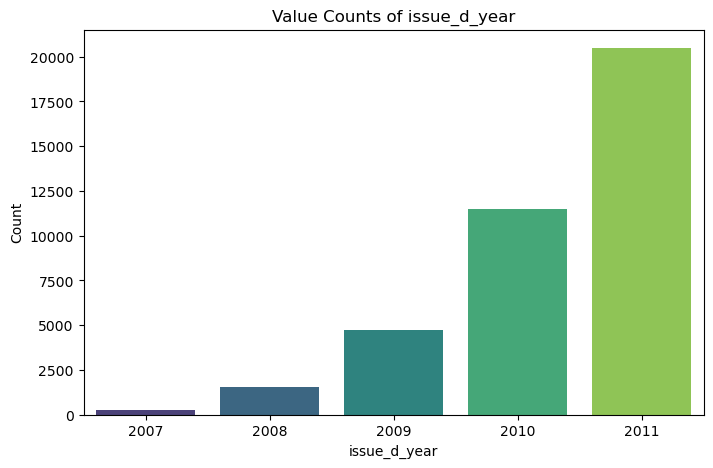

In [110]:
value_counts = data2.issue_d_year.dt.year.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of issue_d_year')
plt.xlabel('issue_d_year')
plt.ylabel('Count')

plt.show()

In [111]:
issue_year_vs_loan = data2.groupby([data2.issue_d_year.dt.year, 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
issue_year_vs_loan['Total'] = issue_year_vs_loan['Charged Off']+ issue_year_vs_loan['Fully Paid']
issue_year_vs_loan['Chargedoff_ratio'] = issue_year_vs_loan['Charged Off'] / issue_year_vs_loan['Total']
issue_year_vs_loan.sort_values('Chargedoff_ratio', ascending=False)
issue_year_vs_loan

loan_status,issue_d_year,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,2007,44,205,249,0.176707
1,2008,247,1311,1558,0.158537
2,2009,593,4107,4700,0.126170
3,2010,1478,10012,11490,0.128634
4,2011,3253,17237,20490,0.158760


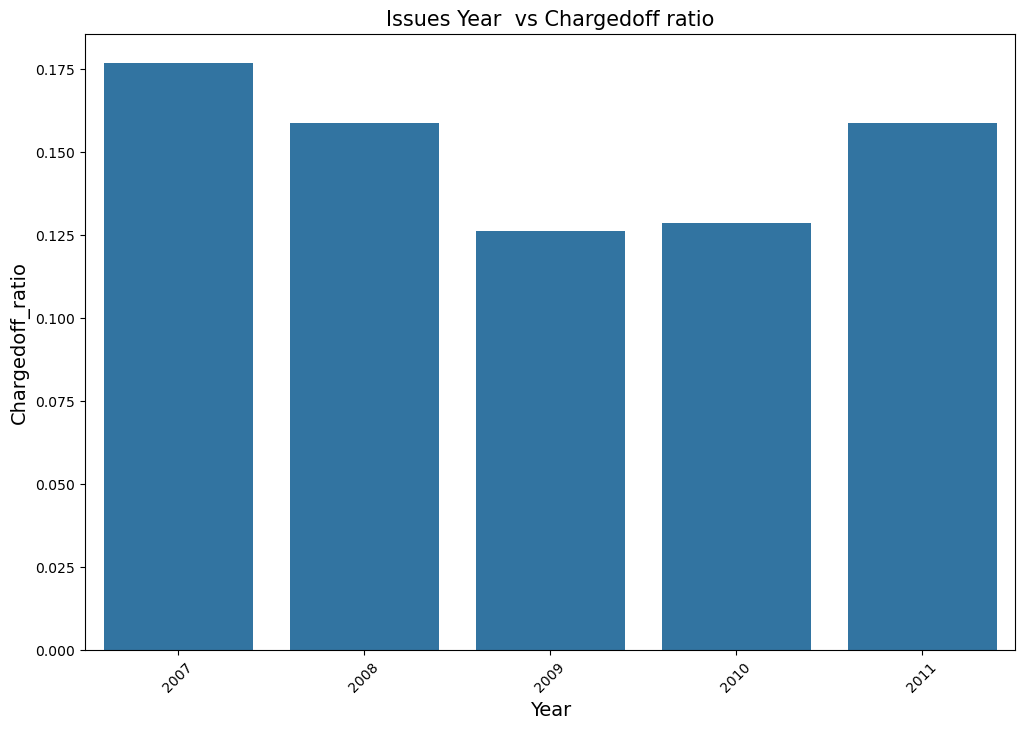

In [112]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Issues Year  vs Chargedoff ratio',fontsize=15)
ax1=sns.barplot(x='issue_d_year', y='Chargedoff_ratio', data=issue_year_vs_loan)
ax1.set_xlabel('Year',fontsize=14)
ax1.set_ylabel('Chargedoff_ratio',fontsize=14)
plt.xticks(rotation=45)
plt.show()
##Most proportion of people charged off were in the year 2007

### purpose v/s charged off


/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/935223131.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


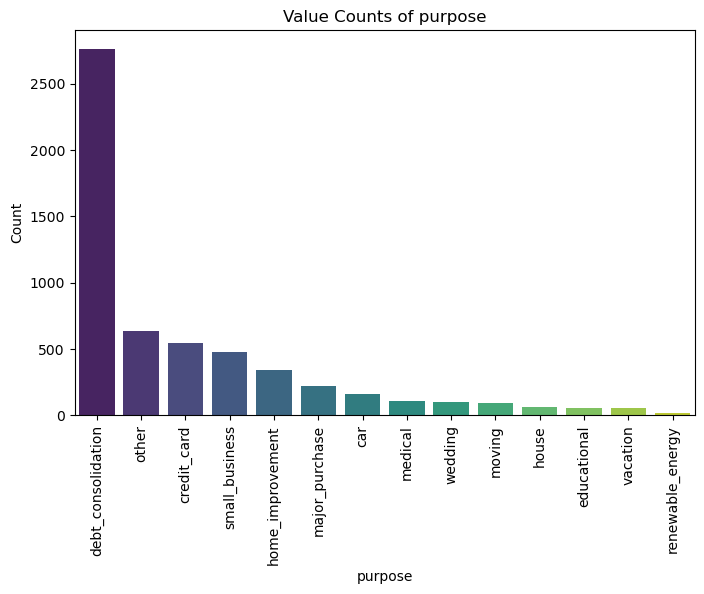

In [113]:
value_counts = charged_off_data['purpose'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of purpose')
plt.xlabel('purpose')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
## As most of the people who are taking the loan have purpose debt_consolidation hence their freq will definetly be higher in the charged off as well
## so need to consider the average of each value in the category

In [114]:
purpose_vs_loan = data2.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off']+ purpose_vs_loan['Fully Paid']
purpose_vs_loan['Chargedoff_ratio'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_ratio', ascending=False)
purpose_vs_loan

loan_status,purpose,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,car,160,1339,1499,0.106738
1,credit_card,542,4476,5018,0.108011
2,debt_consolidation,2764,15263,18027,0.153326
3,educational,56,268,324,0.172840
4,home_improvement,343,2510,2853,0.120224
5,house,59,306,365,0.161644
6,major_purchase,220,1921,2141,0.102756
7,medical,106,572,678,0.156342
8,moving,91,484,575,0.158261
9,other,632,3227,3859,0.163773


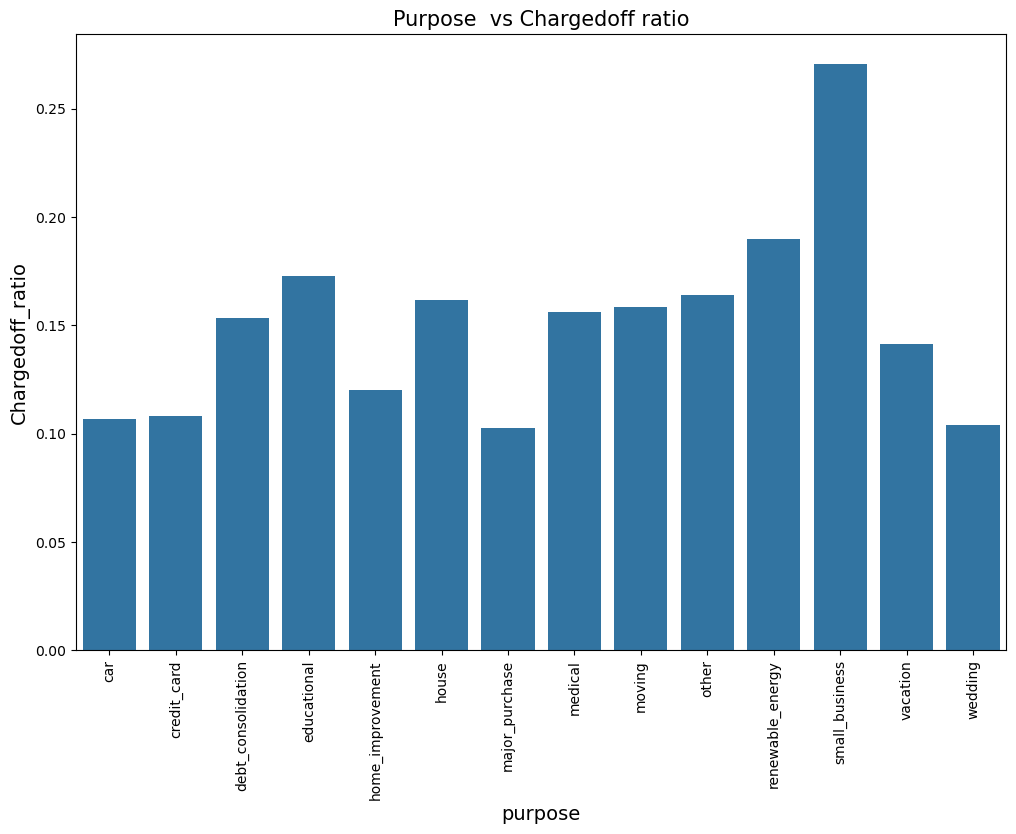

In [115]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Purpose  vs Chargedoff ratio',fontsize=15)
ax1=sns.barplot(x='purpose', y='Chargedoff_ratio', data=purpose_vs_loan)
ax1.set_xlabel('purpose',fontsize=14)
ax1.set_ylabel('Chargedoff_ratio',fontsize=14)
plt.xticks(rotation=90)
plt.show()
##People who are taking loan for small_business are most likely to be charged off

### Address_state vs loan_status

In [116]:
###Address_state vs loan_status
address_vs_loan = data2.groupby(['addr_state', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
address_vs_loan['Total'] = address_vs_loan['Charged Off']+ address_vs_loan['Fully Paid']
address_vs_loan['Chargedoff_ratio'] = address_vs_loan['Charged Off'] / address_vs_loan['Total']
address_vs_loan.sort_values('Chargedoff_ratio', ascending=False)
address_vs_loan

loan_status,addr_state,Charged Off,Fully Paid,Total,Chargedoff_ratio
0,AK,14.0,63.0,77.0,0.181818
1,AL,54.0,380.0,434.0,0.124424
2,AR,27.0,208.0,235.0,0.114894
3,AZ,122.0,722.0,844.0,0.144550
4,CA,1124.0,5815.0,6939.0,0.161983
5,CO,98.0,664.0,762.0,0.128609
6,CT,94.0,630.0,724.0,0.129834
7,DC,15.0,196.0,211.0,0.071090
8,DE,12.0,101.0,113.0,0.106195
9,FL,500.0,2273.0,2773.0,0.180310


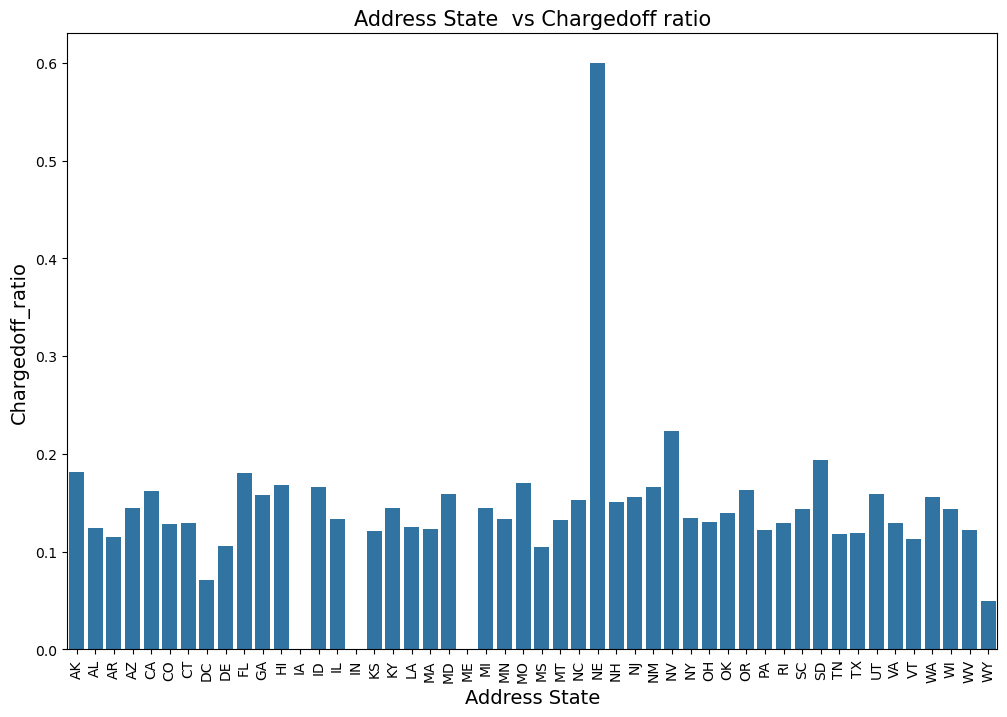

In [117]:
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.set_title('Address State  vs Chargedoff ratio',fontsize=15)
ax1=sns.barplot(x='addr_state', y='Chargedoff_ratio', data=address_vs_loan)
ax1.set_xlabel('Address State',fontsize=14)
ax1.set_ylabel('Chargedoff_ratio',fontsize=14)
plt.xticks(rotation=90)
plt.show()
## People in NE State are mostly getting charged off and no one from IL ,IN and ME are charged off

### DTI v/s charged_off_data

In [118]:
## dti vs charged_off_data
data2.dti.describe()

count    38487.000000
mean        13.295968
std          6.660923
min          0.000000
25%          8.160000
50%         13.390000
75%         18.570000
max         29.990000
Name: dti, dtype: float64

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/1552612849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


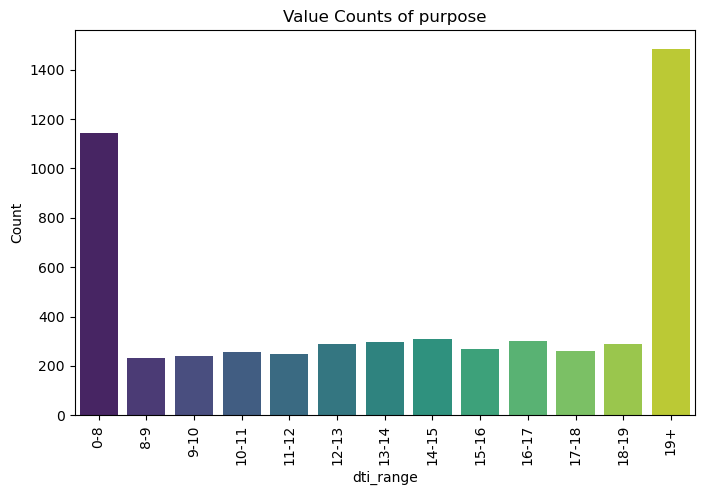

In [119]:
value_counts = charged_off_data['dti_range'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of purpose')
plt.xlabel('dti_range')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
##People with high dti are more likely to get charged off

In [121]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38487 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38487 non-null  int64         
 1   funded_amnt           38487 non-null  int64         
 2   funded_amnt_inv       38487 non-null  float64       
 3   term                  38487 non-null  int64         
 4   int_rate              38487 non-null  float64       
 5   installment           38487 non-null  float64       
 6   grade                 38487 non-null  object        
 7   emp_length            38487 non-null  object        
 8   home_ownership        38487 non-null  object        
 9   annual_inc            38487 non-null  float64       
 10  verification_status   38487 non-null  object        
 11  issue_d               38487 non-null  object        
 12  loan_status           38487 non-null  object        
 13  purpose              

### pub_rec v/s Charged off data



/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/3510373200.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


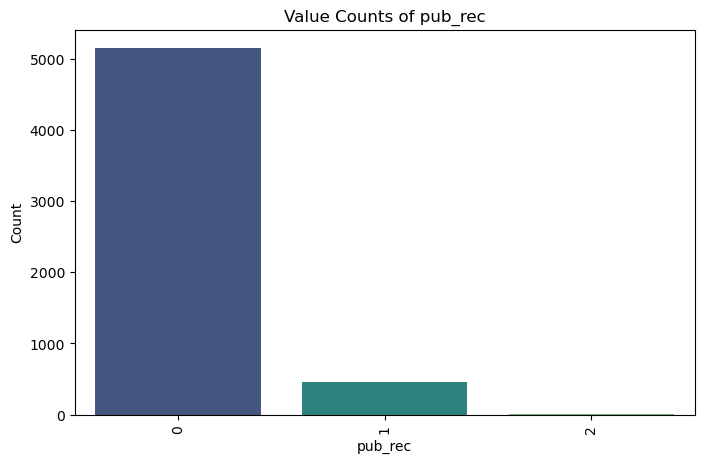

In [122]:
value_counts = charged_off_data['pub_rec'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of pub_rec')
plt.xlabel('pub_rec')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
## Most of the record has pub_rec as 0 so it does no seems to affect loan status

#### pub_rec_bankruptcies v/s charged off data 

/var/folders/bc/gw1nwtsn1sg6pytr6szrwmb80000gn/T/ipykernel_3668/2318449550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


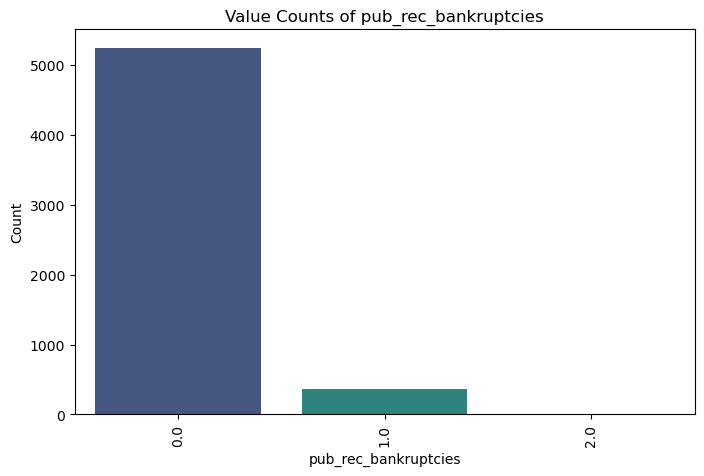

In [124]:
##pub_rec_bankruptcies

value_counts = charged_off_data['pub_rec_bankruptcies'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')

plt.title('Value Counts of pub_rec_bankruptcies')
plt.xlabel('pub_rec_bankruptcies')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
## Most of the record has pub_rec_bankruptcies as 0 so it does no seems to affect loan status